# น.ส.กนิษฐา วงศ์สุวรรณ  6010405076

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

sns.set_context('talk')

In [2]:
census = pd.read_csv("census-income-train.csv")
census

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No
1,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,No
2,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,Yes
3,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,Yes
4,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33869,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,No
33870,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,No
33871,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,No
33872,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,No


In [3]:
census = census.replace(to_replace=" ?", value=np.nan) # change "?" to NaN
census.isna().sum() # check NaN

age                  0
workclass         1979
weight               0
education            0
edu num              0
marital status       0
occupation        1984
relationship         0
race                 0
sex                  0
captial-gain         0
capital-loss         0
hours-per-week       0
native country     593
label                0
dtype: int64

In [6]:
census = census.dropna()
census

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No
1,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,No
2,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,Yes
3,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,Yes
5,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33868,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,No
33869,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,No
33871,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,No
33872,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,No


In [7]:
census.isna().sum()

age               0
workclass         0
weight            0
education         0
edu num           0
marital status    0
occupation        0
relationship      0
race              0
sex               0
captial-gain      0
capital-loss      0
hours-per-week    0
native country    0
label             0
dtype: int64

## K-Means Clustering

In [8]:
# ใช้ edu_num เพราะเป็นตัวเลข หา cluster ง่าย
# และระดับการศึกษา น่าจะส่งผลต่อปริมาณรายได้
from sklearn.cluster import KMeans
cm = KMeans(n_clusters=4)
cm.fit(census[['edu num']]) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
cm.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
cm.cluster_centers_

array([[10.16664626],
       [13.31786154],
       [ 4.58415435],
       [ 8.77572313]])

In [11]:
census['group'] = pd.DataFrame(cm.labels_)
census.head(10)

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native country,label,group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No,1.0
1,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,No,1.0
2,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,Yes,1.0
3,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,Yes,1.0
5,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,No,3.0
6,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,No,3.0
7,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,No,1.0
8,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,Yes,3.0
9,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,No,2.0
10,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,No,3.0


In [12]:
edu_degree = {2:'Primary', 3:'Middle school', 0:'High school', 1:'University'} #ประถม ม.ต้น ม.ปลาย  มหาวิทยาลัย
census.group = census.group.map(edu_degree)
census.head(10)

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native country,label,group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No,University
1,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,No,University
2,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,Yes,University
3,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,Yes,University
5,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,No,Middle school
6,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,No,Middle school
7,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,No,University
8,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,Yes,Middle school
9,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,No,Primary
10,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,No,Middle school


In [13]:
xy = pd.DataFrame(cm.cluster_centers_).reset_index()
xy.columns = ['group','center']
xy.group = xy.group.map(edu_degree)
xy

,group,center
0,High school,10.166646
1,University,13.317862
2,Primary,4.584154
3,Middle school,8.775723


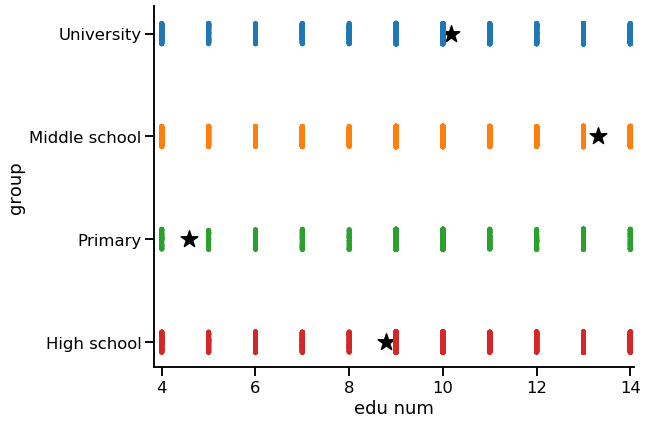

In [14]:
sns.catplot(data=census, x='edu num', y='group', height=6, aspect=1.5)
plot.scatter(xy.center, xy.group, marker='*', s=300, c='black') #plot centers of groups

In [15]:
census.group = pd.Categorical(census.group, categories=['University','High school','Middle school','Primary'], ordered=True)
xy.group = pd.Categorical(xy.group, categories=['University','High school','Middle school','Primary'], ordered=True)
xy.sort_values('group')

,group,center
1,University,13.317862
0,High school,10.166646
3,Middle school,8.775723
2,Primary,4.584154


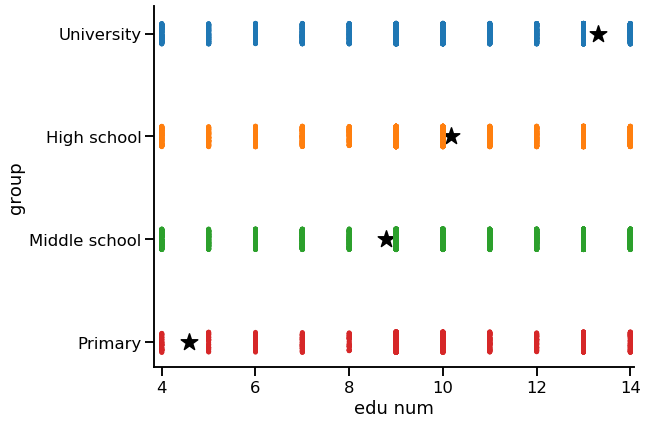

In [16]:
sns.catplot(data=census, x='edu num', y='group', height=6, aspect=1.5)
plot.scatter(xy.sort_values('group').center, xy.sort_values('group').group, 
             marker='*', s=300, c='black')

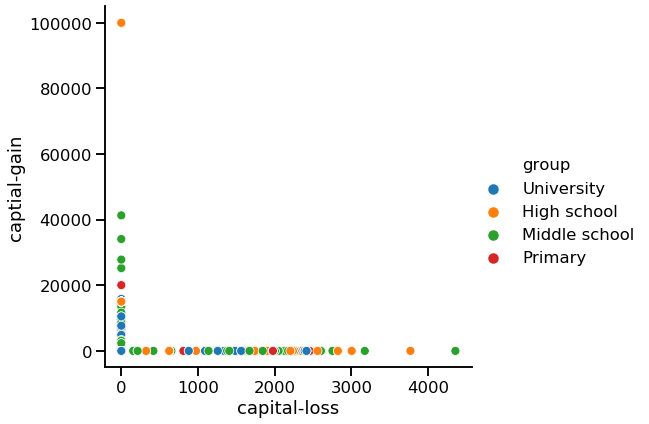

In [17]:
sns.relplot(data=census, x='capital-loss', y='captial-gain', hue='group', height=6, aspect=1.2)

## DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.4, min_samples=5).fit(census[['edu num']])
dbscan.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
set(dbscan.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [20]:
census['dbscan group'] = pd.Series(dbscan.labels_, dtype='category')
census.head(10)

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native country,label,group,dbscan group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No,University,0
1,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,No,University,1
2,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,Yes,University,0
3,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,Yes,University,0
5,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,No,Middle school,3
6,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,No,Middle school,4
7,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,No,University,1
8,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,Yes,Middle school,3
9,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,No,Primary,5
10,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,No,Middle school,4


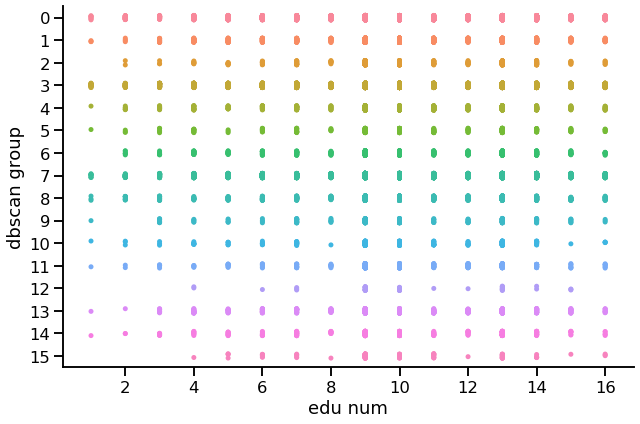

In [21]:
sns.catplot(data=census, x='edu num', y='dbscan group',height=6, aspect=1.5)

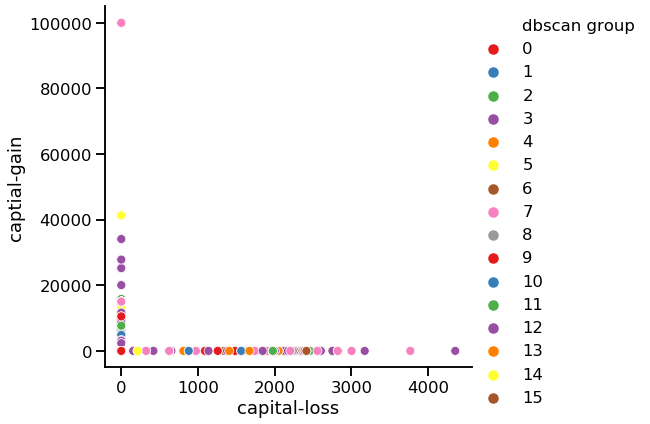

In [22]:
sns.relplot(data=census, x='capital-loss', y='captial-gain', hue='dbscan group', height=6, aspect=1.2,
           palette=sns.color_palette("Set1", census['dbscan group'].nunique()))

## Splitting data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

X = census[['capital-loss', 'captial-gain']]
y = census.group

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.head()

,capital-loss,captial-gain
33187,0,0
19210,625,0
4492,0,0
2737,0,0
1201,0,0


In [24]:
y_train.head()

33187              NaN
19210      High school
4492        University
2737     Middle school
1201       High school
Name: group, dtype: category
Categories (4, object): [University < High school < Middle school < Primary]

In [25]:
X_test.head()

,capital-loss,captial-gain
5939,0,0
8693,0,0
22771,0,0
862,0,0
21716,0,15024


In [26]:
y_test.head()

5939     Middle school
8693        University
22771       University
862      Middle school
21716    Middle school
Name: group, dtype: category
Categories (4, object): [University < High school < Middle school < Primary]

## K-nearest neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

ValueError: Input contains NaN

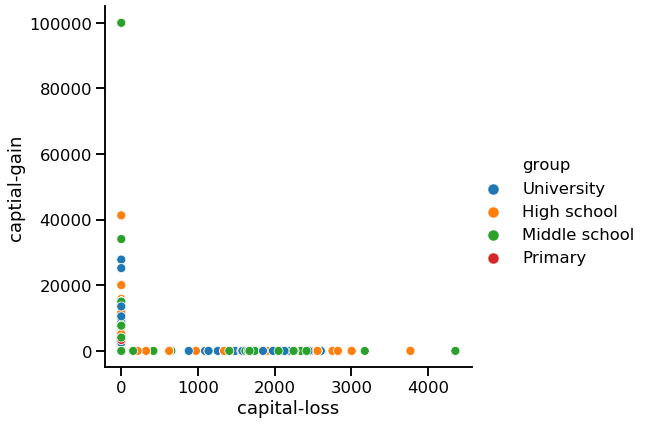

In [28]:
sns.relplot(data=X_train, x='capital-loss', y='captial-gain', hue=y_train, height=6, aspect=1.2)

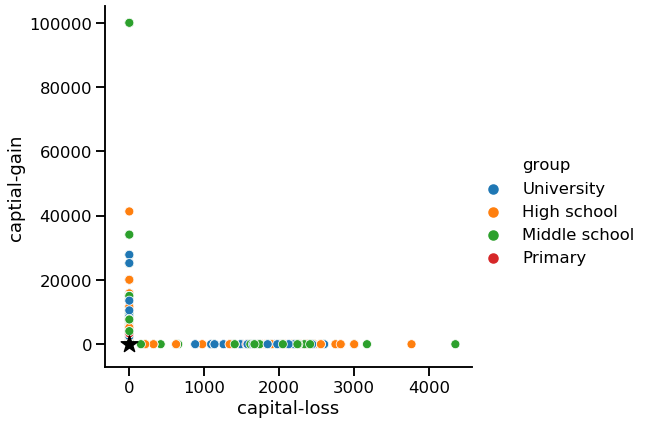

In [30]:
sns.relplot(data=X_train, x='capital-loss', y='captial-gain', hue=y_train, height=6, aspect=1.2)
plot.scatter(0,53,marker='*', s=300, c='black')

In [32]:
y_test.head(10)

5939     Middle school
8693        University
22771       University
862      Middle school
21716    Middle school
6465        University
700      Middle school
12692      High school
13785    Middle school
12907    Middle school
Name: group, dtype: category
Categories (4, object): [University < High school < Middle school < Primary]

In [33]:
knn.score(X_test,y_test)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

y_predict = knn.predict(X_test)
y_predict

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [35]:
cnf = confusion_matrix(y_test, y_predict, labels=['University','High school','Middle school','Primary'])
cnf

NameError: name 'y_predict' is not defined

In [36]:
sns.heatmap(pd.DataFrame(cnf, index=['University','High school','Middle school','Primary'], 
                         columns=['University','High school','Middle school','Primary']), annot=True, cmap='YlOrBr')

NameError: name 'cnf' is not defined

In [32]:
from sklearn.metrics import precision_recall_fscore_support

pre, rec, fs, sup = precision_recall_fscore_support(y_test, y_predict, 
                                                    labels=['University','High school','Middle school','Primary'])
pre

array([0.62311558, 0.26723671, 0.39871383, 0.1875    ])

In [33]:
rec

array([0.12832011, 0.93169811, 0.0329087 , 0.0035461 ])

In [34]:
fs

array([0.21281465, 0.41534191, 0.06079922, 0.00696056])

In [35]:
sup

array([2899, 2650, 3768,  846], dtype=int64)

## Decision Tree

In [36]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier()
DTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

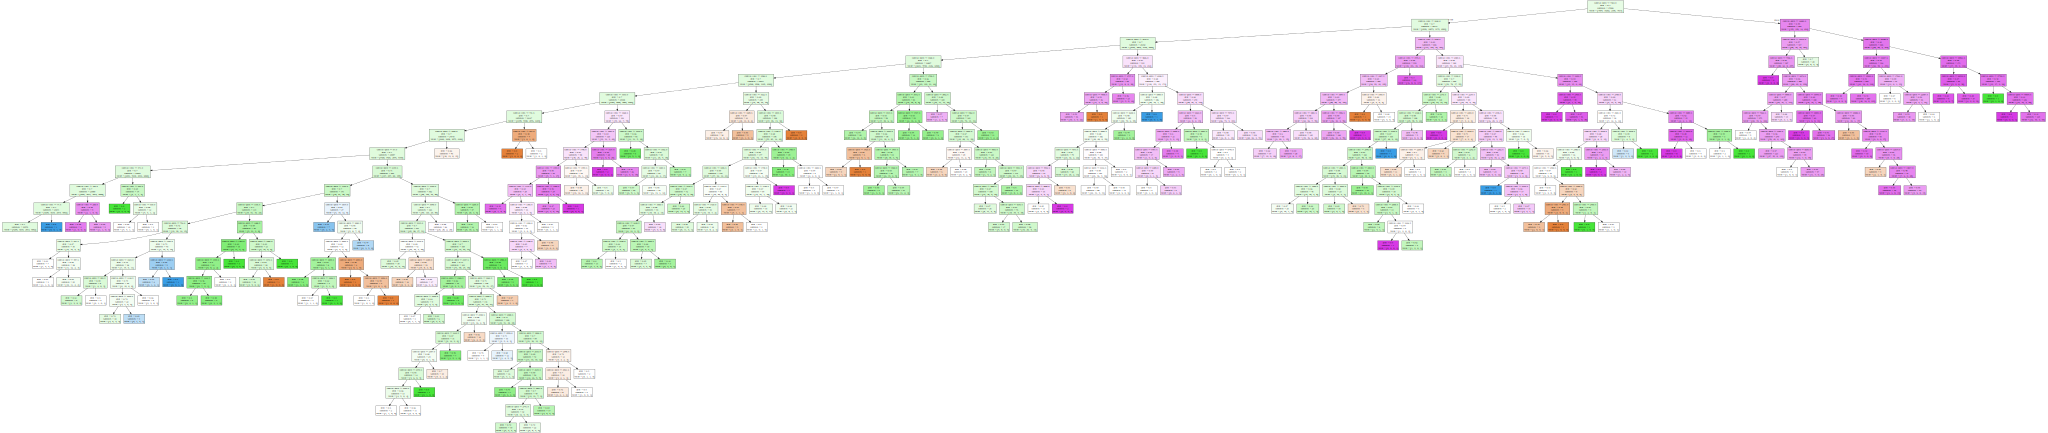

In [38]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(DTree, out_file=None, 
                       feature_names=X.columns, 
                       filled=True, precision=2))

In [39]:
DTree.score(X_test,y_test)

0.3992619926199262

In [40]:
DTree2 = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
DTree2.score(X_test,y_test)

0.3971955719557196

In [41]:
## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train,y_train)
gnb.score(X_test,y_test)

0.3890774907749078

## K-Fold Cross-validation

In [43]:
from sklearn.model_selection import cross_val_score

X = census[['capital-loss', 'captial-gain']]
y = census.group

knn = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(knn, X, y, cv = 10)
score

array([0.27707288, 0.27441723, 0.27589259, 0.27913839, 0.27449823,
       0.28056704, 0.27613703, 0.28529238, 0.28056704, 0.27909037])

In [44]:
score.mean(), score.std()

(0.27826731955844375, 0.0031937191946329727)

In [45]:
from sklearn.model_selection import cross_validate

d_score = cross_validate(knn, X, y, cv=10,
                         scoring=('accuracy','precision_macro','recall_macro','f1_macro'), 
                         return_train_score=False)
pd.DataFrame(d_score)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.904693,2.578655,0.277073,0.219709,0.246252,0.133999
1,0.650652,2.410285,0.274417,0.206781,0.243230,0.131018
2,0.645651,2.545155,0.275893,0.341153,0.247972,0.143275
3,0.682385,2.746472,0.279138,0.287181,0.248404,0.148317
4,0.653651,2.405698,0.274498,0.270584,0.244187,0.134507
5,0.658978,2.393635,0.280567,0.285569,0.248706,0.144434
6,0.670460,2.418786,0.276137,0.306022,0.245844,0.142599
7,0.653506,2.422341,0.285292,0.327463,0.252343,0.141458
8,0.652144,2.397911,0.280567,0.259552,0.246561,0.143813
9,0.649431,3.102188,0.279090,0.315459,0.248350,0.136379


## Running each fold manually

In [46]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
train, test = list(kf.split(X, y))[0]
train

array([ 6775,  6776,  6777, ..., 33871, 33872, 33873])

In [47]:
test

array([   0,    1,    2, ..., 6772, 6773, 6774])

In [48]:
kf = KFold(n_splits=5, shuffle=True)
train, test = list(kf.split(X, y))[0]
train

array([    0,     1,     2, ..., 33871, 33872, 33873])

In [49]:
test

array([    5,    10,    12, ..., 33866, 33869, 33870])

In [50]:
y[test].value_counts()/len(test)

Middle school    0.362952
University       0.287232
High school      0.263469
Primary          0.086347
Name: group, dtype: float64

In [51]:
y.value_counts()/len(y)

Middle school    0.375066
University       0.279861
High school      0.263476
Primary          0.081597
Name: group, dtype: float64

In [52]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X, y):
    print(y[test].value_counts()/len(test))

Middle school    0.375055
University       0.279852
High school      0.263469
Primary          0.081624
Name: group, dtype: float64
Middle school    0.375055
University       0.279852
High school      0.263469
Primary          0.081624
Name: group, dtype: float64
Middle school    0.375055
University       0.279852
High school      0.263469
Primary          0.081624
Name: group, dtype: float64
Middle school    0.375055
University       0.279852
High school      0.263469
Primary          0.081624
Name: group, dtype: float64
Middle school    0.375111
University       0.279894
High school      0.263508
Primary          0.081488
Name: group, dtype: float64


## Gridsearch

In [53]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,31))}

knn_gscv = GridSearchCV(knn2,param_grid, cv=10, refit=False)
X = census[['capital-loss', 'captial-gain']]
y = census.group
knn_gscv.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
knn_gscv.best_params_, knn_gscv.best_score_

({'n_neighbors': 8}, 0.3988309617996103)

In [55]:
knn_gscv.cv_results_

{'mean_fit_time': array([0.7066308 , 0.66282868, 0.65809498, 0.704386  , 0.6582773 ,
        0.70908768, 0.73019612, 0.68569629, 0.70454586, 0.6576381 ,
        0.65526354, 0.70172443, 0.66547935, 0.69420204, 0.6574739 ,
        0.70598001, 0.65627933, 0.66078608, 0.65637071, 0.67631605,
        0.68262494, 0.65726469, 0.70045109, 0.70511534, 0.6595252 ,
        0.7098923 , 0.74397912, 0.74485996, 0.74602158, 0.75768988]),
 'std_fit_time': array([0.07817133, 0.01259098, 0.00528463, 0.09571161, 0.00708842,
        0.09361515, 0.10257047, 0.05007746, 0.08995357, 0.00427204,
        0.00319407, 0.08968235, 0.02381472, 0.07984931, 0.00385031,
        0.09731668, 0.00719645, 0.00832798, 0.00479747, 0.0490581 ,
        0.07229379, 0.00412021, 0.08411719, 0.09426854, 0.00827113,
        0.09471894, 0.02285786, 0.00722372, 0.00968751, 0.05952376]),
 'mean_score_time': array([0.64329665, 0.60048602, 0.59692497, 0.62601132, 0.59892554,
        0.63374021, 0.66515589, 0.6128129 , 0.63758991, 0.59